# Diabetes Classification Model

In this notebook, we will be building a **classification model** to predict whether a person is likely to have `diabetes` or not, based on tabular data obtained from [Kaggle](https://www.kaggle.com/). 

Our goal is to build a model that can accurately predict whether a person is likely to have diabetes or not, based on features such as age, body mass index (BMI), blood glucose levels, and smoking history, among others. 

We will explore the data, perform some preprocessing steps, and train various machine learning models to identify the best performing one. By building an accurate classification model, we hope to provide insights into the risk factors associated with diabetes and potentially improve early detection and prevention efforts.

**NOTE:** In this type of problems, we want to obtain as many `True Positives` as possible (i.e, correctly classify people with diabetes)

In this notebook, we will cover the following topics:

- Data exploration and visualization
- Data preprocessing
- Feature engineering
- Model training and evaluation

Let's get started!


# 1 | Importing Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("diabetes_prediction_dataset.csv")
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 2 | Exploratory Data Analysis:

In [3]:
# Missing values check
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
# Remove duplicates
print(f"Number of duplicates: {dataset.duplicated().sum()}")
dataset.drop_duplicates(inplace=True)

Number of duplicates: 3854


Below we are looking at the **proportion** of `each class` in the dataset:

In [5]:
# The dataset is clearly inbalanced
dataset.diabetes.value_counts(normalize = True).apply(lambda x: f"{x:.2%}")

0    91.18%
1     8.82%
Name: diabetes, dtype: object

We are clearly dealing with an `inbalanced classification` problem.

## 2.1 | A look at the pairwise correlations:
- Based on the heatmap of the correlation matrix shown below, it appears that none of the features are strongly correlated with each other.

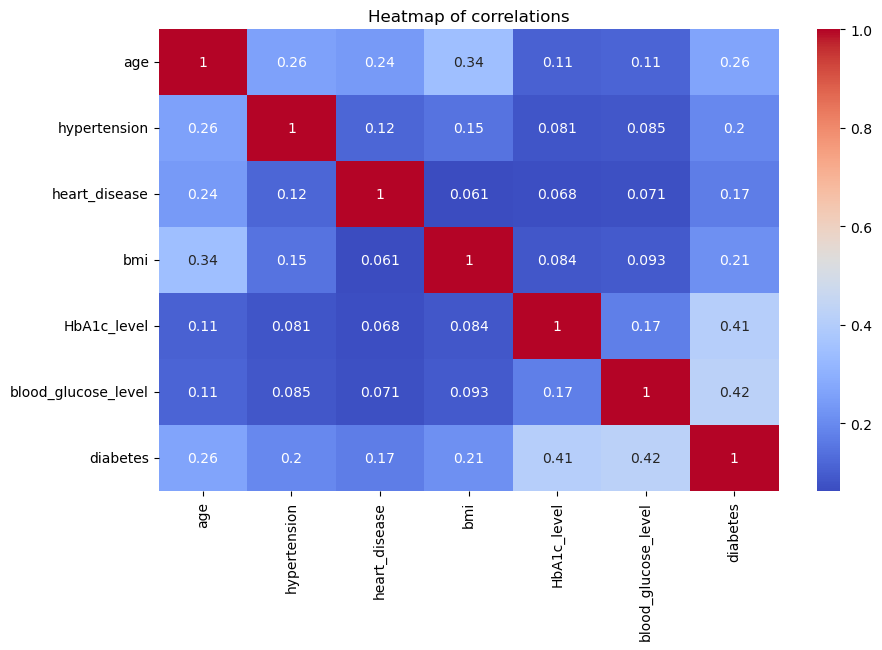

In [6]:
# Visualising correlation between variables:
corr_matrix = dataset.corr()

# plot the correlation matrix using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of correlations")

# show the plot
plt.show()

## 2.2 |  Distribution of numerical features, grouped by peoplehaving diabetes or not:
- When we group the numerical features by diabetes status, we can observe a clear pattern in the `HbA1c_level` and `blood_glucose_level` variables, which respectively represent the average blood sugar level over the last 3 months and the amount of glucose in the bloodstream at a given time. The data shows that higher levels of blood sugar are strongly associated with having diabetes.
- We can also notice that older people are more likely to be associated with having diabetes.

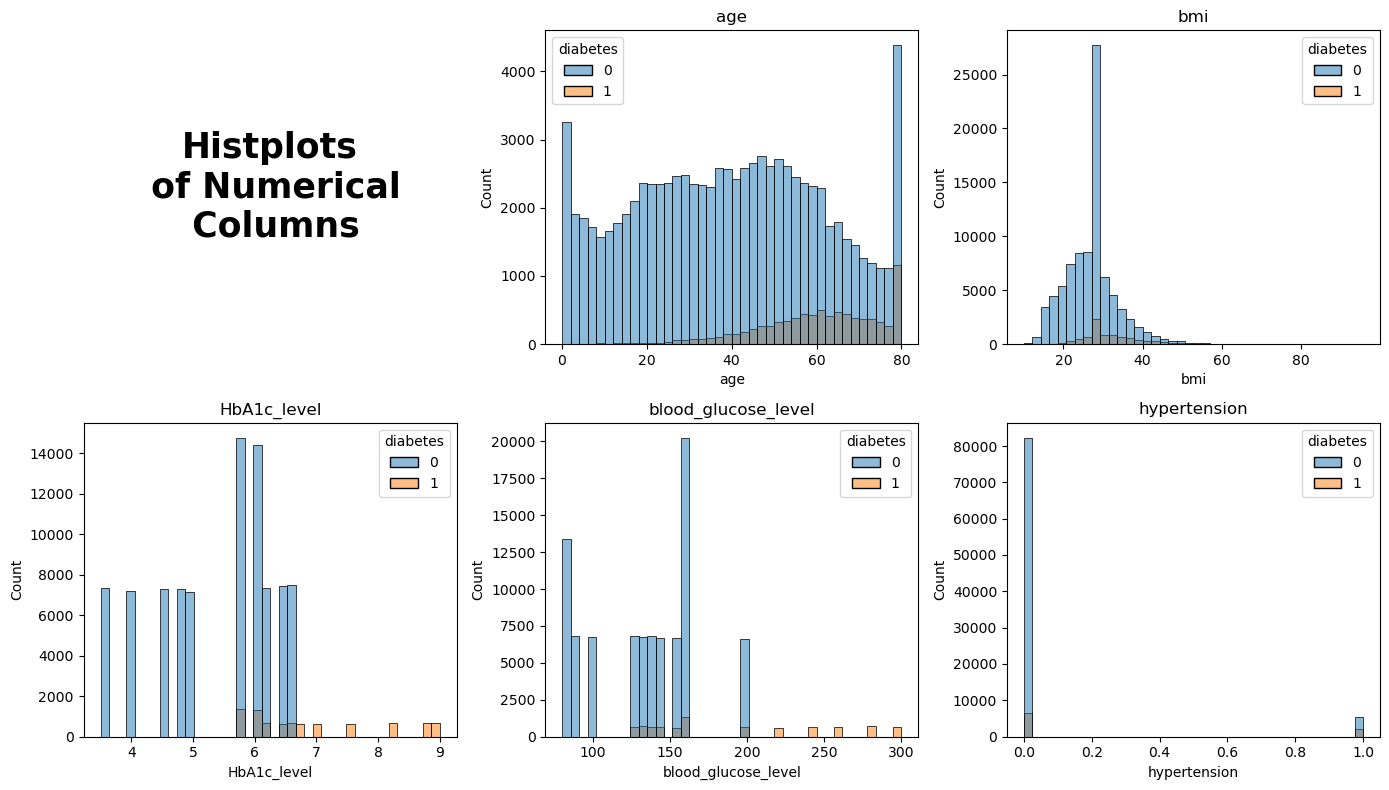

In [7]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension']


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
ax = axs[0,0]
ax.text(0.5, 0.5, "Histplots\n of Numerical\n Columns", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

for i, col in enumerate(numerical_features):
    ax = axs[(i+1) // 3, (i+1) % 3]
    sns.histplot(dataset, x=col, hue="diabetes", ax=ax, kde=False, bins=40)
    ax.set_title(col)

fig.tight_layout()
plt.show()

## 2.3 | Age vs numerical columns:

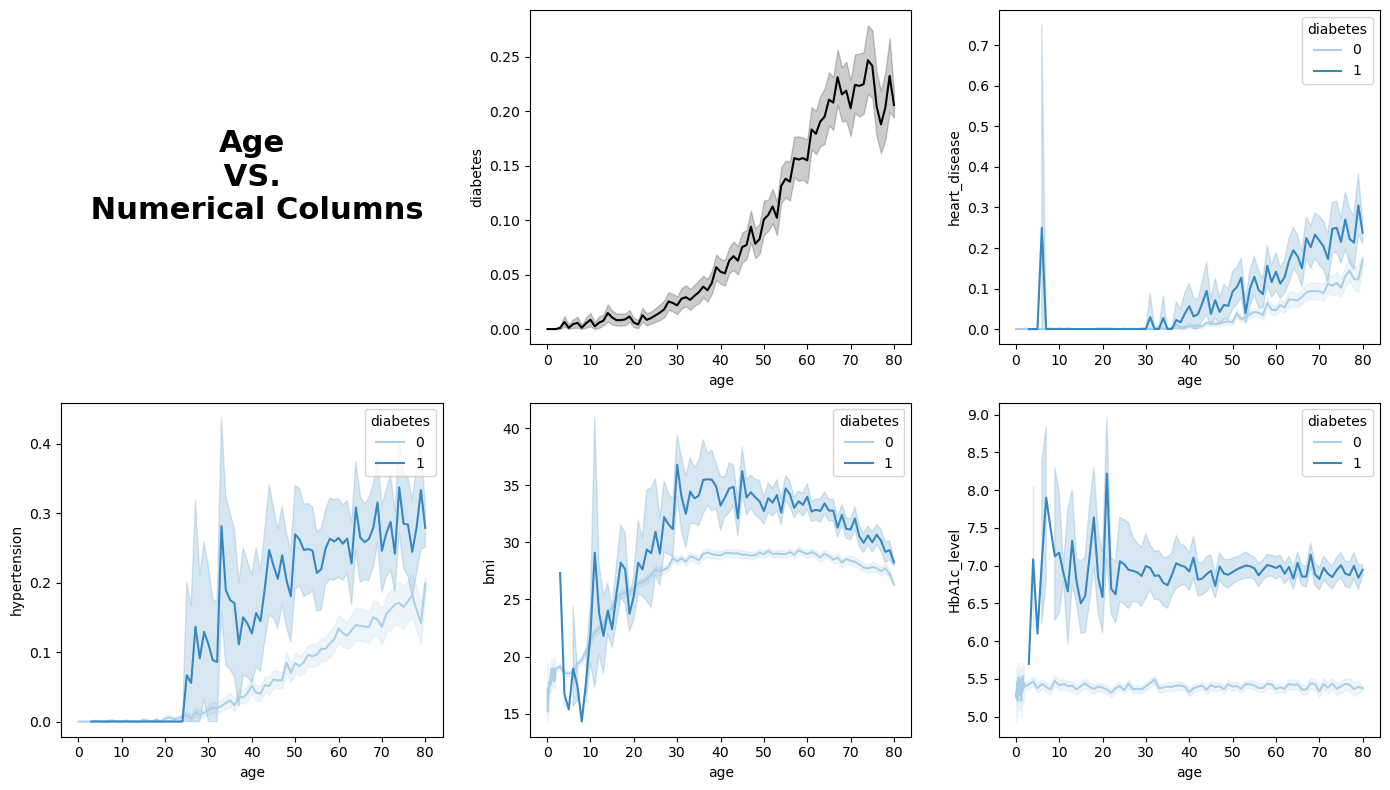

In [8]:
fig = plt.figure(figsize = (14,8))

ax = plt.subplot(2,3,1)
ax.text(0.5, 0.5, "Age\n VS. \n Numerical Columns", fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

plt.subplot(2,3, 2)
sns.lineplot(x = dataset['age'], y =  dataset['diabetes'], color = "black")

plt.subplot(2,3,3)
sns.lineplot(x = dataset['age'], y =  dataset['heart_disease'], hue = dataset['diabetes'], palette='Blues')


plt.subplot(2,3,4)
sns.lineplot(x = dataset['age'], y =  dataset['hypertension'], hue = dataset['diabetes'], palette='Blues')

plt.subplot(2,3,5)
sns.lineplot(x = dataset['age'],y = dataset['bmi'], hue = dataset['diabetes'], palette='Blues')

plt.subplot(2,3,6)
sns.lineplot(x = dataset['age'], y =  dataset['HbA1c_level'], hue = dataset['diabetes'], palette='Blues' )

plt.tight_layout()
plt.show()

## 2.5 | Blood glucose level  a HBA1c vs diabetes:

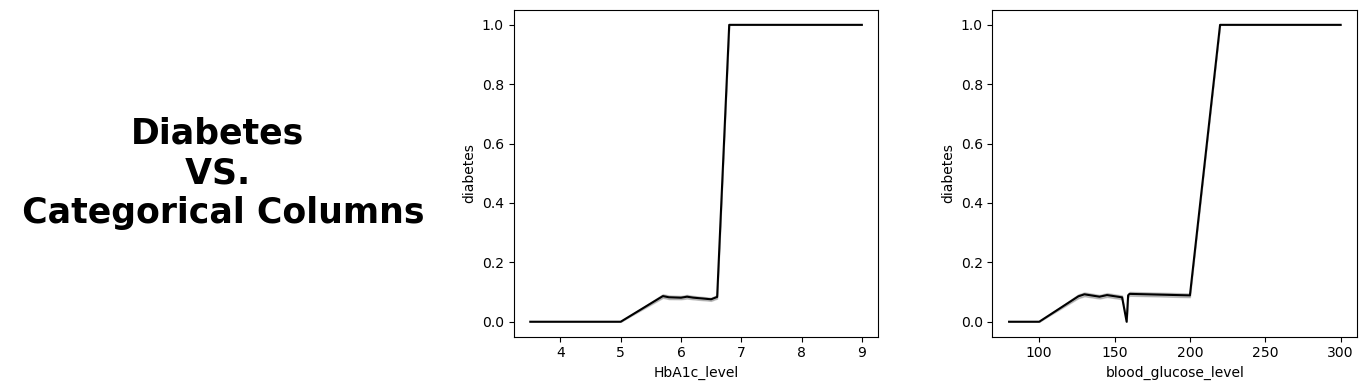

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
ax = axs[0]
ax.text(0.5, 0.5, "Diabetes\n VS. \n Categorical Columns", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

plt.subplot(1,3, 2)
sns.lineplot(x=dataset["HbA1c_level"], y=dataset["diabetes"], ax = axs[1], color='black')

plt.subplot(1,3,3)
sns.lineplot(x=dataset["blood_glucose_level"], y=dataset["diabetes"], ax = axs[2], color='black')

plt.tight_layout()
plt.show()

## 3 | Build Classification models and pick the best one:

In [10]:
# Split dependent variable from independent variables:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [11]:
# Encode categorical data:
X = pd.get_dummies(X, columns=['gender', 'smoking_history'])
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0


**REMINDER**: As seen above, the dataset is `imbalanced`.
When splitting the dataset into a training set and a test set, we will make sure that the split is `Stratified`so that we get the same class ratios in the training and test sets compared with the entire dataset y:

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Let's verify that `Stratify`worked as expected:

In [13]:
print(f"Percentage of patients with diabetes in training set: {y_train.sum()/len(y_train):.2%}\n")
print(f"Percentage of patients with diabetes in test set: {y_test.sum()/len(y_test):.2%}")

Percentage of patients with diabetes in training set: 8.82%

Percentage of patients with diabetes in test set: 8.82%


Stratification worked **as expected**

### Standardising numerical features:

In [14]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data:
sc = StandardScaler()
X_train.iloc[:,[0,3,4,5]] = sc.fit_transform(X_train.iloc[:,[0,3,4,5]])
X_test.iloc[:,[0,3,4,5]] = sc.transform(X_test.iloc[:,[0,3,4,5]])

## Logistic Regression:

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay

# define the logistic regression model
lr = LogisticRegression()

# define the hyperparameters to tune
params = [{'C': [0.05, 0.08, 0.1, 0.25, 0.5, 0.75, 1.0, 5.0], 'penalty': ['l2']}]




# perform grid search cross-validation
grid_search = GridSearchCV(
    lr,
    param_grid=params,
    scoring='roc_auc',
    cv=10,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'C': 0.05, 'penalty': 'l2'}
Test set roc_auc_score: 0.8083081441770275
Test set accuracy: 0.9592823712948518
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17534
           1       0.88      0.62      0.73      1696

    accuracy                           0.96     19230
   macro avg       0.92      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230



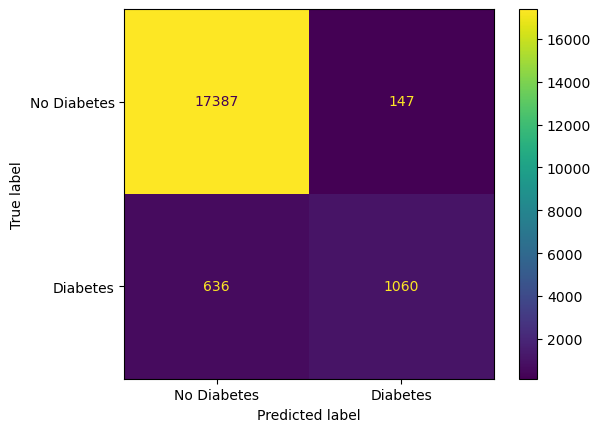

In [42]:
ConfusionMatrixDisplay.from_estimator(grid_search,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

## K-NN

In [44]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
knn = KNeighborsClassifier()
params = {'n_neighbors': [1, 4, 9, 13, 25, 50, 75, 100, 150, 200, 300, 500]}

# perform grid search cross-validation
grid_search = GridSearchCV(
    knn,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'n_neighbors': 200}
Test set roc_auc_score: 0.7526533018867925
Test set accuracy: 0.9563702548101924
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     17534
           1       1.00      0.51      0.67      1696

    accuracy                           0.96     19230
   macro avg       0.98      0.75      0.82     19230
weighted avg       0.96      0.96      0.95     19230

CPU times: user 7.61 s, sys: 350 ms, total: 7.96 s
Wall time: 1min 28s


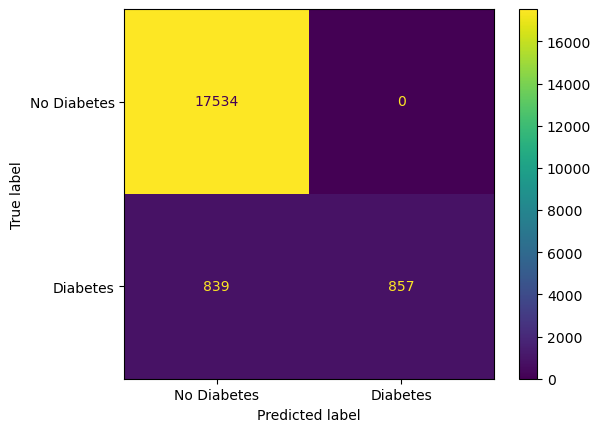

In [45]:
ConfusionMatrixDisplay.from_estimator(grid_search,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

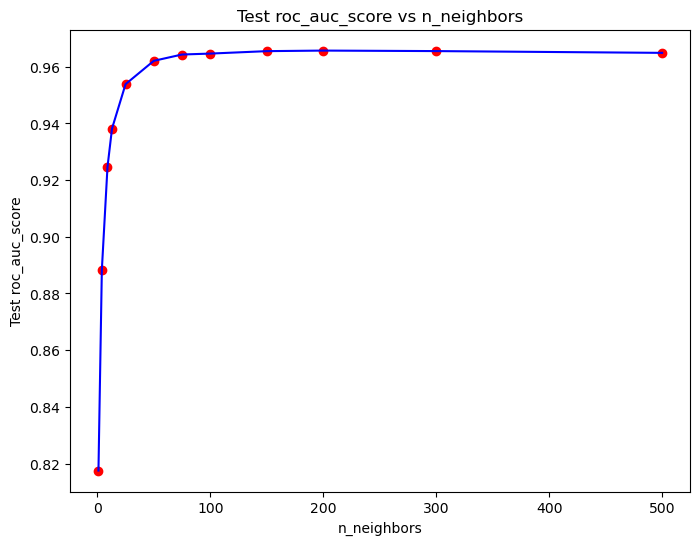

In [46]:
results = grid_search.cv_results_

# Get the values of n_neighbors and their corresponding mean training scores
n_neighbors = results['param_n_neighbors'].data.astype(int)
test_scores = results['mean_test_score']

# Plot the accuracies
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(n_neighbors, test_scores, color = 'red')
ax.plot(n_neighbors, test_scores, color = 'blue')
ax.set_xlabel('n_neighbors')
ax.set_ylabel('Test roc_auc_score')
ax.set_title('Test roc_auc_score vs n_neighbors')


plt.show()

## Kernel SVM: RBF

In [47]:
%%time
svm_classifier = SVC()
params = {'kernel': ['rbf'], 'C': [5, 10, 15], 'gamma': [0.1, 1, 10]}

# perform grid search cross-validation
grid_search = HalvingGridSearchCV(
    svm_classifier,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

/Users/anasbadaoui/anaconda3/envs/MachineLearningProjects/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best hyperparameters: {'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}
Test set roc_auc_score: 0.8167607247159697
Test set accuracy: 0.9669266770670827
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       0.99      0.63      0.77      1696

    accuracy                           0.97     19230
   macro avg       0.98      0.82      0.88     19230
weighted avg       0.97      0.97      0.96     19230

CPU times: user 44.2 s, sys: 949 ms, total: 45.2 s
Wall time: 1min 54s


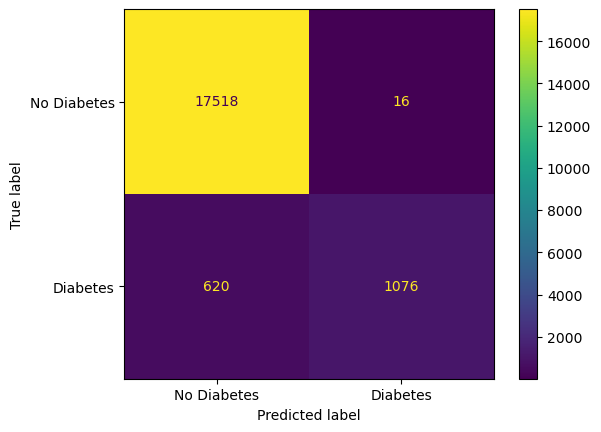

In [48]:
ConfusionMatrixDisplay.from_estimator(grid_search,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

## Random Forest:

In [49]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
params = {
    'n_estimators': [200, 250, 300],
    'max_depth': [8, 10, 15],
    'min_samples_split': [10, 15, 25, 50],
    'min_samples_leaf': [3, 4, 10],
    'bootstrap': [True, False]
}


# perform grid search cross-validation
grid_search = HalvingGridSearchCV(
    rfc,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}
Test set roc_auc_score: 0.8339356783370745
Test set accuracy: 0.970566822672907
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       1.00      0.67      0.80      1696

    accuracy                           0.97     19230
   macro avg       0.98      0.83      0.89     19230
weighted avg       0.97      0.97      0.97     19230

CPU times: user 18.9 s, sys: 5.78 s, total: 24.6 s
Wall time: 1min 28s


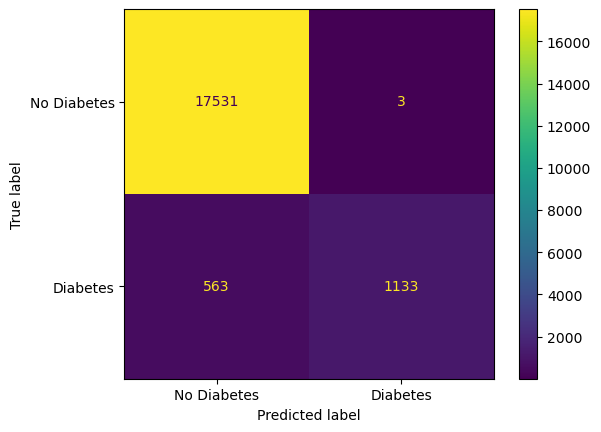

In [50]:
ConfusionMatrixDisplay.from_estimator(grid_search,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

## XGBoost:
Building trees using **early stopping** instead of fixing an optimal number of trees (determined using cross-validation):

In [89]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            use_label_encoder=False,
                            seed=0)
xgb_clf.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.85256
[1]	validation_0-aucpr:0.85976
[2]	validation_0-aucpr:0.86259
[3]	validation_0-aucpr:0.86660
[4]	validation_0-aucpr:0.86789
[5]	validation_0-aucpr:0.87382
[6]	validation_0-aucpr:0.87298
[7]	validation_0-aucpr:0.87311
[8]	validation_0-aucpr:0.87550
[9]	validation_0-aucpr:0.87652
[10]	validation_0-aucpr:0.87801
[11]	validation_0-aucpr:0.87822
[12]	validation_0-aucpr:0.87909
[13]	validation_0-aucpr:0.87927
[14]	validation_0-aucpr:0.88058
[15]	validation_0-aucpr:0.88363
[16]	validation_0-aucpr:0.88402
[17]	validation_0-aucpr:0.88424
[18]	validation_0-aucpr:0.88422
[19]	validation_0-aucpr:0.88620
[20]	validation_0-aucpr:0.88631
[21]	validation_0-aucpr:0.88744
[22]	validation_0-aucpr:0.88751
[23]	validation_0-aucpr:0.88763
[24]	validation_0-aucpr:0.88809
[25]	validation_0-aucpr:0.88814
[26]	validation_0-aucpr:0.88808
[27]	validation_0-aucpr:0.88799
[28]	validation_0-aucpr:0.88826
[29]	validation_0-aucpr:0.88830
[30]	validation_0-aucpr:0.88843
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Performance analysis on **Testing Dataset**:

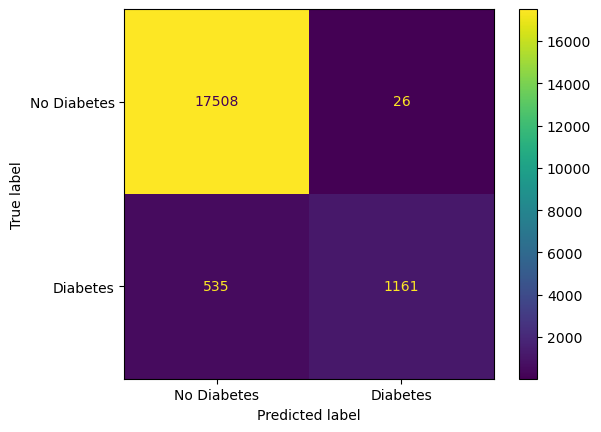

In [54]:
ConfusionMatrixDisplay.from_estimator(xgb_clf,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

From the confusion matrix, we see that from the **17534** that **did not have diabetes**, **17508 (99.8%)** were correctly classified. And of the **1696** people that **have diabetes**, **1161 (68.4%)** were correctly classified.

So far, the first XGBoost model we have trained `without hyperparameter tuning`performs better than the previous models (**Less False Negatives**).

We still want to have **less False Negatives** because in the real world, it's dangerous to classify people as not having diabetes when in reality they do.

**XGBoost** has a parameter, `scale_pos_weight`, that helps with imbalanced data.

The main idea is that `scale_pos_weight` adds a penalty for incorrectly classifying the **minority class**.

Let's try improving predictions using **Cross-Validation**!

### Optimize Hyperparameters using Cross Validation and Grid Search:

We have many `hyperparameters`to optimize:

1. `max_depth`: the maximum tree debth
2. `learning_rate`: eta the learning rate
3. `gamma`: for encouraging pruning
4. `reg_lambda`: the regularization parameter

We will use GridSearchCV() to test many possible combinations of the hyperparameters.

In [77]:
%%time
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            use_label_encoder=False,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            seed=0,
                            eval_metric='logloss')

# ROUND 1
params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.25, 1],
    'reg_lambda': [0, 1, 10],
    'scale_pos_weight': [len(y_train)//y_train.sum()] # Recommended Value for scale_pos_weight
}


# perform grid search cross-validation
grid_search = HalvingGridSearchCV(
    xgb_clf,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

# Best hyperparameters: {'gamma': 1, 'learning_rate': 0.05
# 'max_depth': 5, 'reg_lambda': 1, 'scale_pos_weight': 11}

Best hyperparameters: {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 1, 'scale_pos_weight': 11}
Test set roc_auc_score: 0.9097121751056169
Test set accuracy: 0.8873114924596984
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17534
           1       0.44      0.94      0.59      1696

    accuracy                           0.89     19230
   macro avg       0.71      0.91      0.76     19230
weighted avg       0.94      0.89      0.90     19230

CPU times: user 19.5 s, sys: 2.26 s, total: 21.8 s
Wall time: 59 s


In [79]:
# ROUND 2
params = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.05],
    'gamma': [1, 2.5, 4, 8],
    'reg_lambda': [1, 5, 7],
    'scale_pos_weight': [len(y_train)//y_train.sum()] # Recommended Value for scale_pos_weight
}


# perform grid search cross-validation
grid_search = HalvingGridSearchCV(
    xgb_clf,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

#Best hyperparameters: {'gamma': 8, 'learning_rate': 0.05,
# 'max_depth': 7, 'reg_lambda': 7, 'scale_pos_weight': 11}

Best hyperparameters: {'gamma': 8, 'learning_rate': 0.05, 'max_depth': 7, 'reg_lambda': 7, 'scale_pos_weight': 11}
Test set roc_auc_score: 0.9139992300672979
Test set accuracy: 0.8946437857514301
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     17534
           1       0.45      0.94      0.61      1696

    accuracy                           0.89     19230
   macro avg       0.72      0.91      0.77     19230
weighted avg       0.95      0.89      0.91     19230



We'll stop at round 2, let's take the `Best Hyperparameters`to create our final **XGBoost** model:

In [91]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            use_label_encoder=False,
                            seed=0,
                            max_depth=7,
                            gamma=8,
                            learning_rate=0.05,
                            reg_lambda=7,
                            scale_pos_weight=11,
                            eval_metric='logloss'
                           )
xgb_clf.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.86086
[1]	validation_0-aucpr:0.86086
[2]	validation_0-aucpr:0.86105
[3]	validation_0-aucpr:0.86529
[4]	validation_0-aucpr:0.86584
[5]	validation_0-aucpr:0.86655
[6]	validation_0-aucpr:0.86638
[7]	validation_0-aucpr:0.86760
[8]	validation_0-aucpr:0.86784
[9]	validation_0-aucpr:0.86839
[10]	validation_0-aucpr:0.86881
[11]	validation_0-aucpr:0.86958
[12]	validation_0-aucpr:0.86987
[13]	validation_0-aucpr:0.87092
[14]	validation_0-aucpr:0.87147
[15]	validation_0-aucpr:0.87176
[16]	validation_0-aucpr:0.87294
[17]	validation_0-aucpr:0.87384
[18]	validation_0-aucpr:0.87426
[19]	validation_0-aucpr:0.87422
[20]	validation_0-aucpr:0.87498
[21]	validation_0-aucpr:0.87533
[22]	validation_0-aucpr:0.87610
[23]	validation_0-aucpr:0.87676
[24]	validation_0-aucpr:0.87701
[25]	validation_0-aucpr:0.87710
[26]	validation_0-aucpr:0.87751
[27]	validation_0-aucpr:0.87795
[28]	validation_0-aucpr:0.87810
[29]	validation_0-aucpr:0.87799
[30]	validation_0-aucpr:0.87822
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=8, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=7, scale_pos_weight=11, seed=0,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

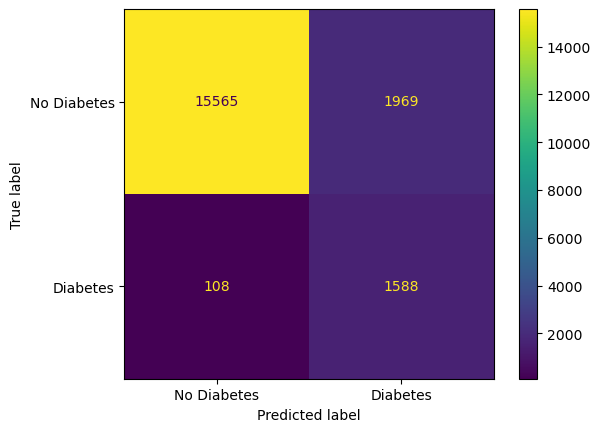

In [92]:
ConfusionMatrixDisplay.from_estimator(xgb_clf,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

From the confusion matrix, we see that from the **17534** that **did not have diabetes**, **15565 (88.8%)** were correctly classified. And of the **1696** people that **have diabetes**, **1588 (93.6%)** were correctly classified.

There is a large improvement in correctly classifying people with diabetes. However, that happened at the expense of losing accuracy in predicting people with no diabetes. But that was expected and inteded as we can tolerate **False Negatives** more than **False Positives**

### A look at feature importance:

**Importance** is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the `purity (Gini index)` used to select the split points or another more specific error function.

The feature importances are then **averaged across all of the the decision trees** within the model.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

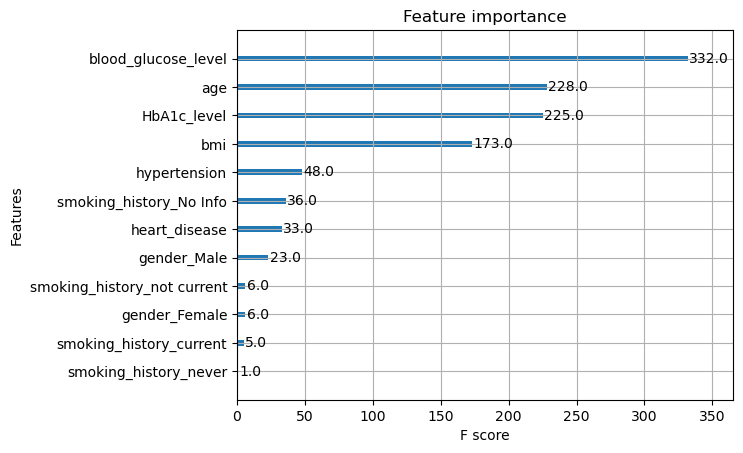

In [93]:
from xgboost import plot_importance
plot_importance(xgb_clf)

**NOTE**: 4 of the features are clearly having a lot of `importance` compared of the rest of the features.

The 4 features are:

1. `blood_glucose_level`
2. `age`
3. `HbA1c_level`
4. `bmi`

The importance of these features was anticipated thanks to the **Exploratory Data Analysis** that we performed at the beginning of the Notebook

# In conclusion we...

#### 1. Loaded the Diabetes Prediction dataset from Kaggle
#### 2. Did Exploratory Data Analysis. Among the main conclusion was that the dataset is imbalanced
#### 3. Cleaned and preprocessed the data
#### 4. Built, Interpreted and Evaluated many models
#### 5. Focused on XGBoost and adjusted the hyperparameters such that we get less False Negatives